Training Data: Accuracy using epoch 125 is: 97.10%
Validation Data: Accuracy using epoch 125 is: 91.48%
Test Data: Accuracy using epoch 125 is: 91.48%


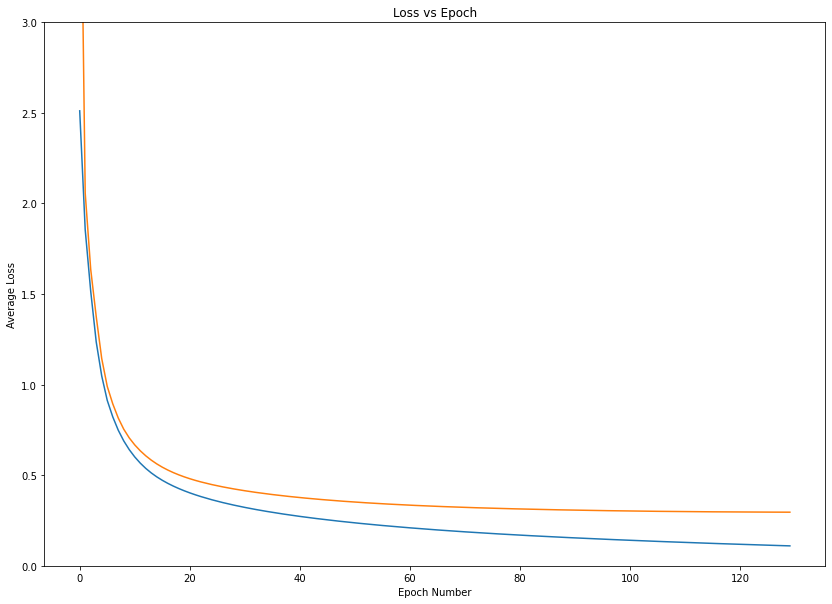

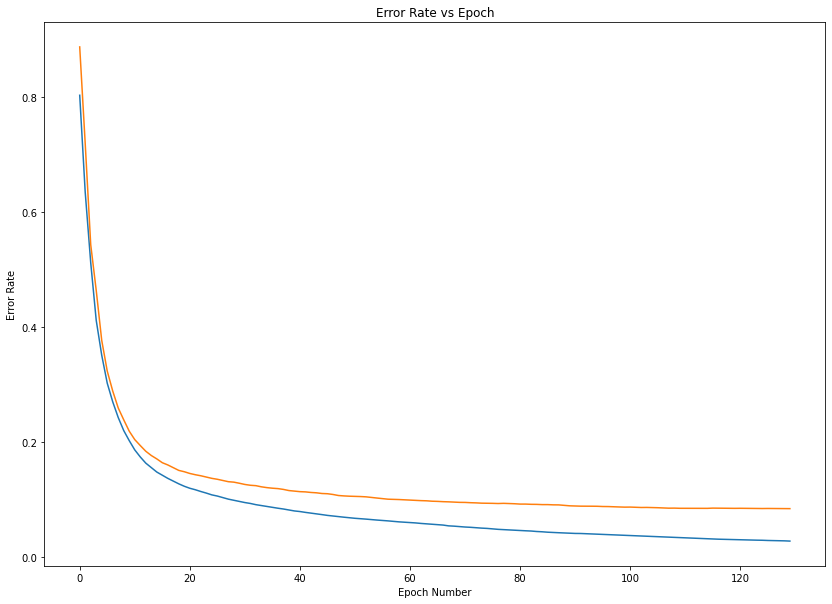

In [2]:
import numpy as np
import pandas as pd
import enum
from NeuralNetwork.Enumerations import ActivationFunctionType
from NeuralNetwork.Enumerations import WeightInitializationType
from NeuralNetwork.Enumerations import LossFunctionType
from NeuralNetwork.NeuralNetwork import NeuralNetwork
import matplotlib.pyplot as plt

"""
Here I am converting the MNIST data set from [Label, x1, x2, x784] to 2 separate arrays, 
inputData = [x1, x2, ..., x784]
expectedOutput is an array entirely of 0s except where Y[Label] = 1 
"""

def CreateOutputVectorsForMnist(classifier):
    array = np.zeros(shape=(10), dtype=int)
    array[classifier] = 1
    return array

mnist_raw = pd.read_csv('dataset/mnist_train.csv', sep=',', header=None, dtype=int).transpose()
mnist_classifiers = mnist_raw[:1]
mnist_data = mnist_raw[1:].transpose()
expectedOutputList = []
for i in mnist_classifiers:
    expectedOutputList.append(CreateOutputVectorsForMnist(mnist_classifiers[i]))
expectedOutput = np.stack(expectedOutputList)
inputData = mnist_data

"""
Here I am normalizing all MNIST data from [0,255] to [0,1] by dividing by 255
I am splitting the 60000 input/output pairs into 30000 input/output pairs for training data, 
20000 input/output pairs for validation data, and 10000 input/output pairs for test data
"""

# Normalizing all data to be from [0, 1] instead of [0, 255]
normalizedInputData = inputData.values/255 

normalizedTrainingData = normalizedInputData[0:29999]
normalizedValidationData = normalizedInputData[30000:39999]
normalizedTestData = normalizedInputData[40000:len(inputData)-1]

trainingExpectedOutput = expectedOutput[0:29999]
validationExpectedOutput = expectedOutput[30000:39999]
testExpectedOutput = expectedOutput[40000:len(inputData)-1]

# NOTE: Each row is an input/output pair, and each column is the output from the neurons in a layer
inputNeuronsCount = inputData.shape[1]
outputNeuronsCount = expectedOutput.shape[1]

# Set the batch size and number of epochs
numberOfEpochs = 500
batchSize = 2048

"""
Here I am creating a 3 hidden layer neural network with 75 neurons in the first layer, 50 neurons in the second layer, and 25 neurons in the third layer.
I am setting all of the activation functions to sigmoid. The Loss Function is set to Softmax Loss with Cross Entropy. 
The batch size is 2048. The number of epochs is 500. Weights are initialized to N(0,1). Learning Rate is initialized to 0.001.
"""

# Three Hidden Layer Neural Network with Softmax Loss
threeLayerNeuronsPerLayer = [75, 50, 25]
threeLayerActivationFunctionsPerLayer = [ActivationFunctionType.Sigmoid, ActivationFunctionType.Sigmoid, ActivationFunctionType.Sigmoid]

# Instantiate and train the Neural Network
threeLayerNeuralNetwork = NeuralNetwork(inputNeuronsCount, outputNeuronsCount, threeLayerNeuronsPerLayer, threeLayerActivationFunctionsPerLayer, WeightInitializationType.Gaussian, LossFunctionType.Softmax)
threeLayerNeuralNetwork.Train(normalizedTrainingData, trainingExpectedOutput, batchSize, 130, normalizedValidationData, validationExpectedOutput)

# Get Error Rate and Loss data per Epoch
trainingLossPerEpoch = threeLayerNeuralNetwork.GetTrainingLossPerEpoch()
trainingErrorRatePerEpoch = threeLayerNeuralNetwork.GetTrainingErrorRatePerEpoch()
validationLossPerEpoch = threeLayerNeuralNetwork.GetValidationLossPerEpoch()
validationErrorRatePerEpoch = threeLayerNeuralNetwork.GetValidationErrorRatePerEpoch()

# Plot Loss per Epoch for the 3-layer Neural Network for both training and validation data
plt.figure(figsize=(14,10))
plt.ylim(top=3)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch Number")
plt.ylabel("Average Loss")
plt.plot(range(len(trainingLossPerEpoch)), trainingLossPerEpoch, label="training")
plt.plot(range(len(validationLossPerEpoch)), validationLossPerEpoch, label="validation")

# Plot Error Rate per Epoch for the 3-layer Neural Network for both training and validation data
plt.figure(figsize=(14,10))
plt.title("Error Rate vs Epoch")
plt.xlabel("Epoch Number")
plt.ylabel("Error Rate")
plt.plot(range(len(trainingErrorRatePerEpoch)), trainingErrorRatePerEpoch, label="training")
plt.plot(range(len(validationErrorRatePerEpoch)), validationErrorRatePerEpoch, label="validation")

"""
The user is also able to select a model used at any given epoch. The user is then able to predict the class label for new data points. 
Here I am predicting the class label for the test data, that was not used for training the model or for validation.

Here I am selecting an epoch before overfitting has occured, and displaying the accuracy at that epoch for the training data set, 
the validation data set, and the test data set. This is to show that the model is still able to generalize to data not used to train it. 

The specific epoch is being chosen based on the error rate of the training data set versus the loss of the validation data set, 
at an epoch where the loss of the validation data set has not begun to increase due to overfitting to the training data set. 

Epoch Number 125 was chosen to maximize accuracy for both training and validation data sets before overfitting occurs.
"""

epochNumber = 125
threeLayerNeuralNetwork.SetWeightsFromEpoch(epochNumber)
trainingLoss, trainingErrorRate, trainingYhat = threeLayerNeuralNetwork.Predict(normalizedTrainingData, trainingExpectedOutput)
validationLoss, validationErrorRate, validationYhat = threeLayerNeuralNetwork.Predict(normalizedValidationData, validationExpectedOutput)
testLoss, testErrorRate, testYhat = threeLayerNeuralNetwork.Predict(normalizedValidationData, validationExpectedOutput)
trainingAccuracyAsPercentage = "{:.2%}".format(1 - trainingErrorRate)
validationAccuracyAsPercentage = "{:.2%}".format(1 - validationErrorRate)
testAccuracyAsPercentage = "{:.2%}".format(1 - testErrorRate)
print("Training Data: Accuracy using epoch " + str(epochNumber) + " is: " + str(trainingAccuracyAsPercentage))
print("Validation Data: Accuracy using epoch " + str(epochNumber) + " is: " + str(validationAccuracyAsPercentage))
print("Test Data: Accuracy using epoch " + str(epochNumber) + " is: " + str(validationAccuracyAsPercentage))